In [ ]:
#import libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('Car_sales.csv')
data.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


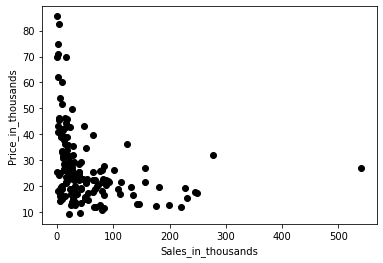

In [ ]:
X = data[["Sales_in_thousands","Price_in_thousands"]]
#Visualise data points
plt.scatter(X["Sales_in_thousands"],X["Price_in_thousands"],c='black')
plt.xlabel('Sales_in_thousands')
plt.ylabel('Price_in_thousands')
plt.show()

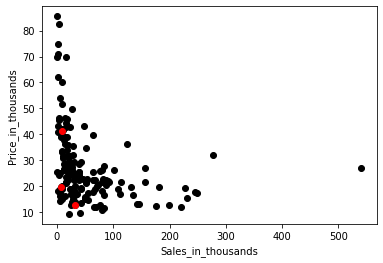

In [ ]:

# Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster

#number of clusters
K=3

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["Sales_in_thousands"],X["Price_in_thousands"],c='black')
plt.scatter(Centroids["Sales_in_thousands"],Centroids["Price_in_thousands"],c='red')
plt.xlabel('Sales_in_thousands')
plt.ylabel('Price_in_thousands')
plt.show()

In [ ]:


# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["Sales_in_thousands"]-row_d["Sales_in_thousands"])**2
            d2=(row_c["Price_in_thousands"]-row_d["Price_in_thousands"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["Price_in_thousands","Sales_in_thousands"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['Sales_in_thousands'] - Centroids['Sales_in_thousands']).sum() + (Centroids_new['Price_in_thousands'] - Centroids['Price_in_thousands']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["Price_in_thousands","Sales_in_thousands"]]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


44.5598765271075
24.197968322938866
21.162116436251893
27.88160093795097
10.398991064887213
14.970548275621642
5.491798215794887
9.020754762218088
6.3701210144988
3.8558563400370716
5.88294505972306
0.9180797500603788
0.0


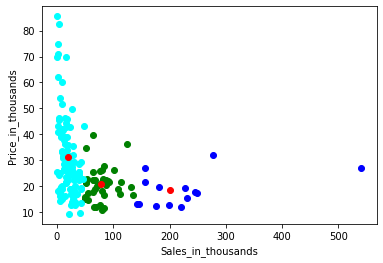

In [ ]:
color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["Sales_in_thousands"],data["Price_in_thousands"],c=color[k])
plt.scatter(Centroids["Sales_in_thousands"],Centroids["Price_in_thousands"],c='red')
plt.xlabel('Sales_in_thousands')
plt.ylabel('Price_in_thousands')
plt.show()